Time Series Analysis

Getting Google Trends data of keywords such as 'diet' and 'gym' and see how they vary over time while learning about trends and seasonality in time series data.

We will go through the code that we put together during the session step by step. You're not going to do much mathematics but you are going to do the following:

* Source your data

* Wrangle your data
* Exploratory Data Analysis
* Trends and seasonality in time series data
*Identifying Trends
*Seasonal patterns
*First Order Differencing
*Periodicity and Autocorrelation

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


Wrangle Your Data

The first thing that you want to do is rename the columns of your DataFrame df so that they have no whitespaces in them. There are multiple ways to do this, but for now, you'll reassign to df.columns a list of what you want the columns to be called.

Double check the result of your reassignment by calling df.head():

In [4]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


Next, you'll turn the **'month' column** into a DateTime data type and make it the index of the DataFrame.

Note that you do this because you saw in the result of the .**info()** method that the **'Month' column** was actually an of data type object. Now, that generic data type encapsulates everything from strings to integers, etc. That's not exactly what you want when you want to be looking at time series data. That's why you'll use **.to_datetime()** to convert the **'month' column** in your DataFrame to a DateTime.

Be careful! Make sure to include the inplace argument when you're setting the index of the DataFrame df so that you actually alter the original index and set it to the 'month' column.

In [5]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

In [6]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


**A bit of Exploratory Data Analysis (EDA)**

You can use a built-in pandas visualization method .plot() to plot your data as 3 line plots on a single figure (one for each column, namely, **'diet', 'gym', and 'finance'**).

Note that you can also specify some arguments to this method, such as **figsize, linewidthand fontsize** to set the figure size, line width and font size of the plot, respectively.

Additionally, you'll see that what you see on the x-axis is not the months, as the default label suggests, but the years. To make your plot a bit more accurate, you'll specify the label on the x-axis to 'Year' and also set the font size to 20.

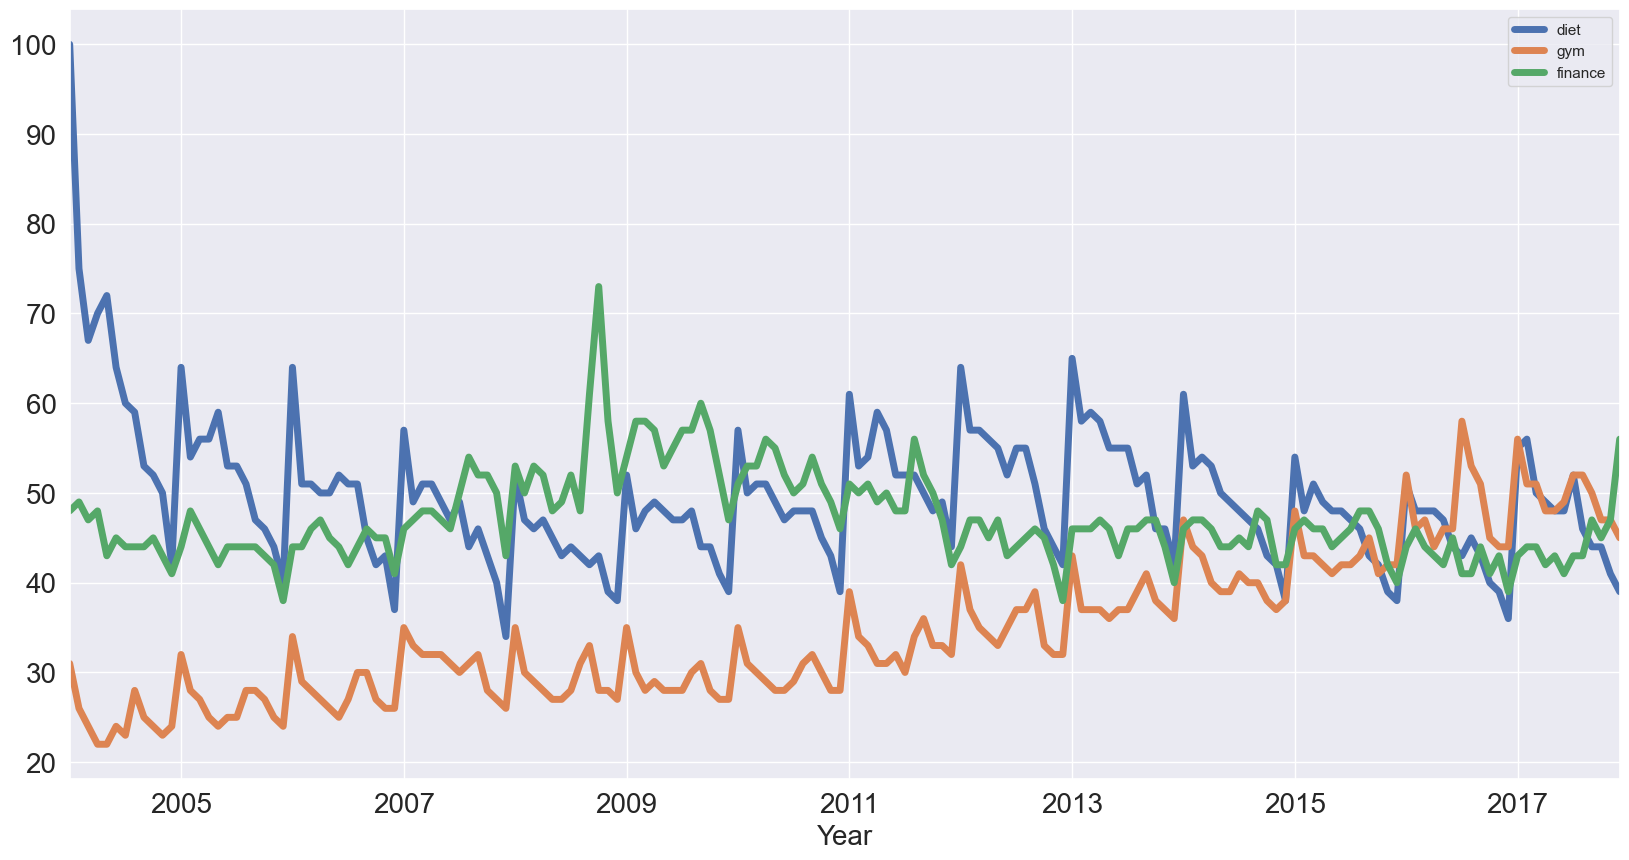

In [7]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. Likewise a score of 0 means the term was less than 1% as popular as the peak.

**If you want, you can also plot the 'diet' column by itself as a time series:**

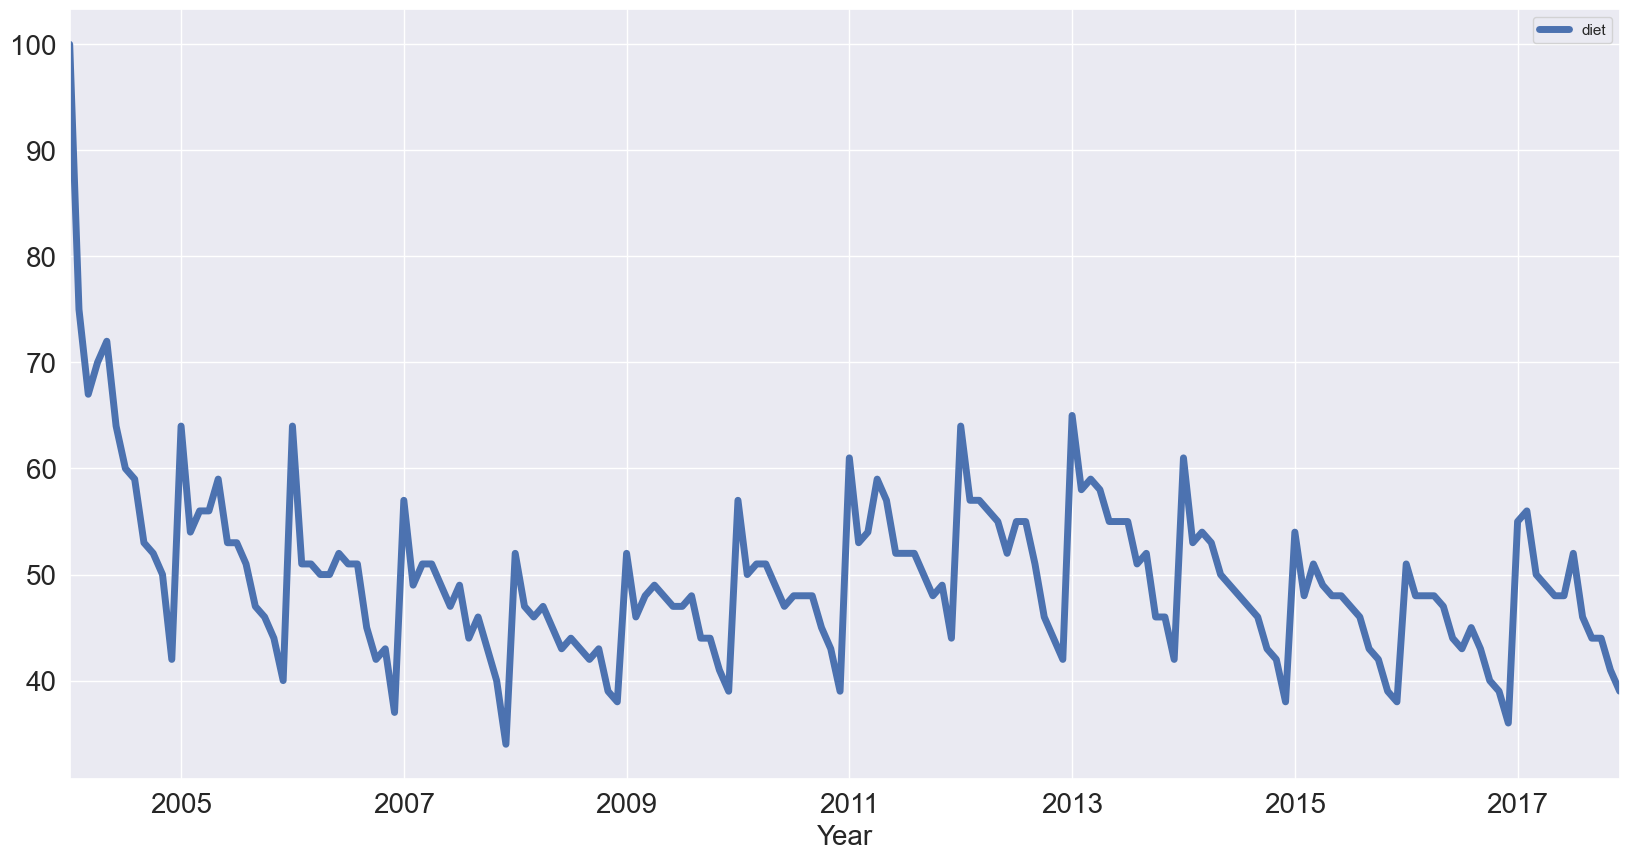

In [8]:
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Note: the first thing to notice is that there is seasonality: each January, there's a big jump. Also, there seems to be a trend: it seems to go slightly up, then down, back up and then back down. In other words, it looks like there are trends and seasonal components to these time series.

With this in mind, you'll learn how to identify trends in your time series!

**Identifying Trends in Time Series**

There are several ways to think about identifying trends in time series. One popular way is by taking a rolling average, which means that, for each time point, you take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

What happens then because you take the average is it tends to smooth out noise and seasonality. You'll see an example of that right now. Check out this rolling average of 'diet' using the built-in pandas methods.

When it comes to determining the window size, here, it makes sense to first try out one of twelve months, as you're talking about yearly seasonality.

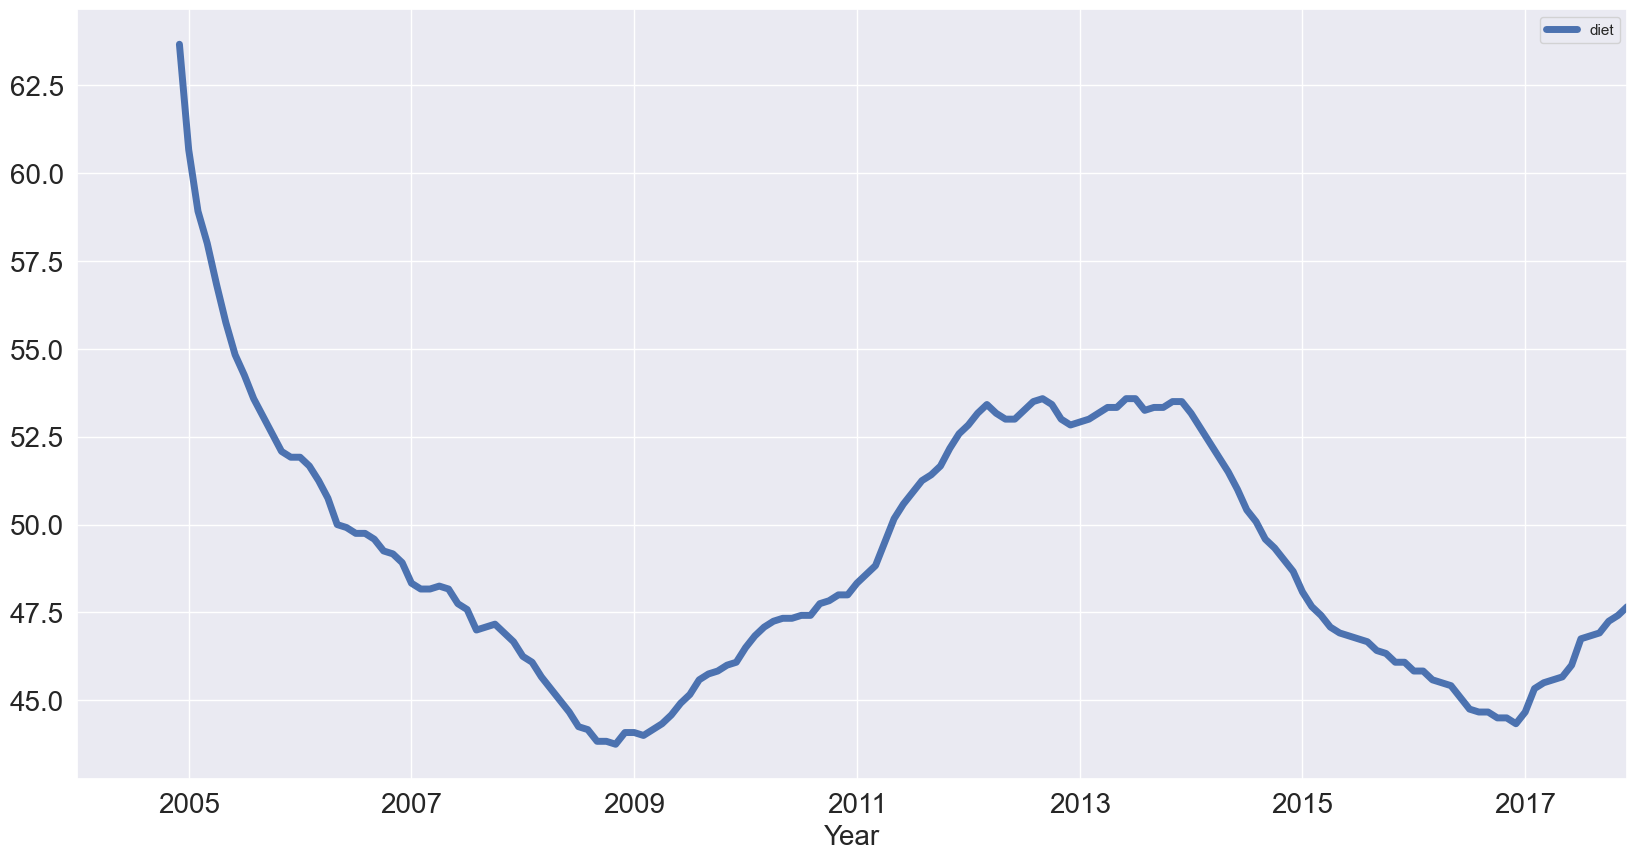

In [9]:
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Note that in the code chunk above you used two sets of squared brackets to extract the 'diet' column as a DataFrame; 

If you would have used one set, like df['diet'], you would have created a pandas Series.

In the code chunk above, you also chained methods: you called methods on an object one after another. Method chaining is pretty popular and pandas is one of the packages that really allows you to use that style of programming to the max!

Now you have the trend that you're looking for! You have removed most of the seasonality compared to the previous plot.

You can also plot the rolling average of 'gym' using built-in pandas methods with the same window size as you took for the 'diet' data:

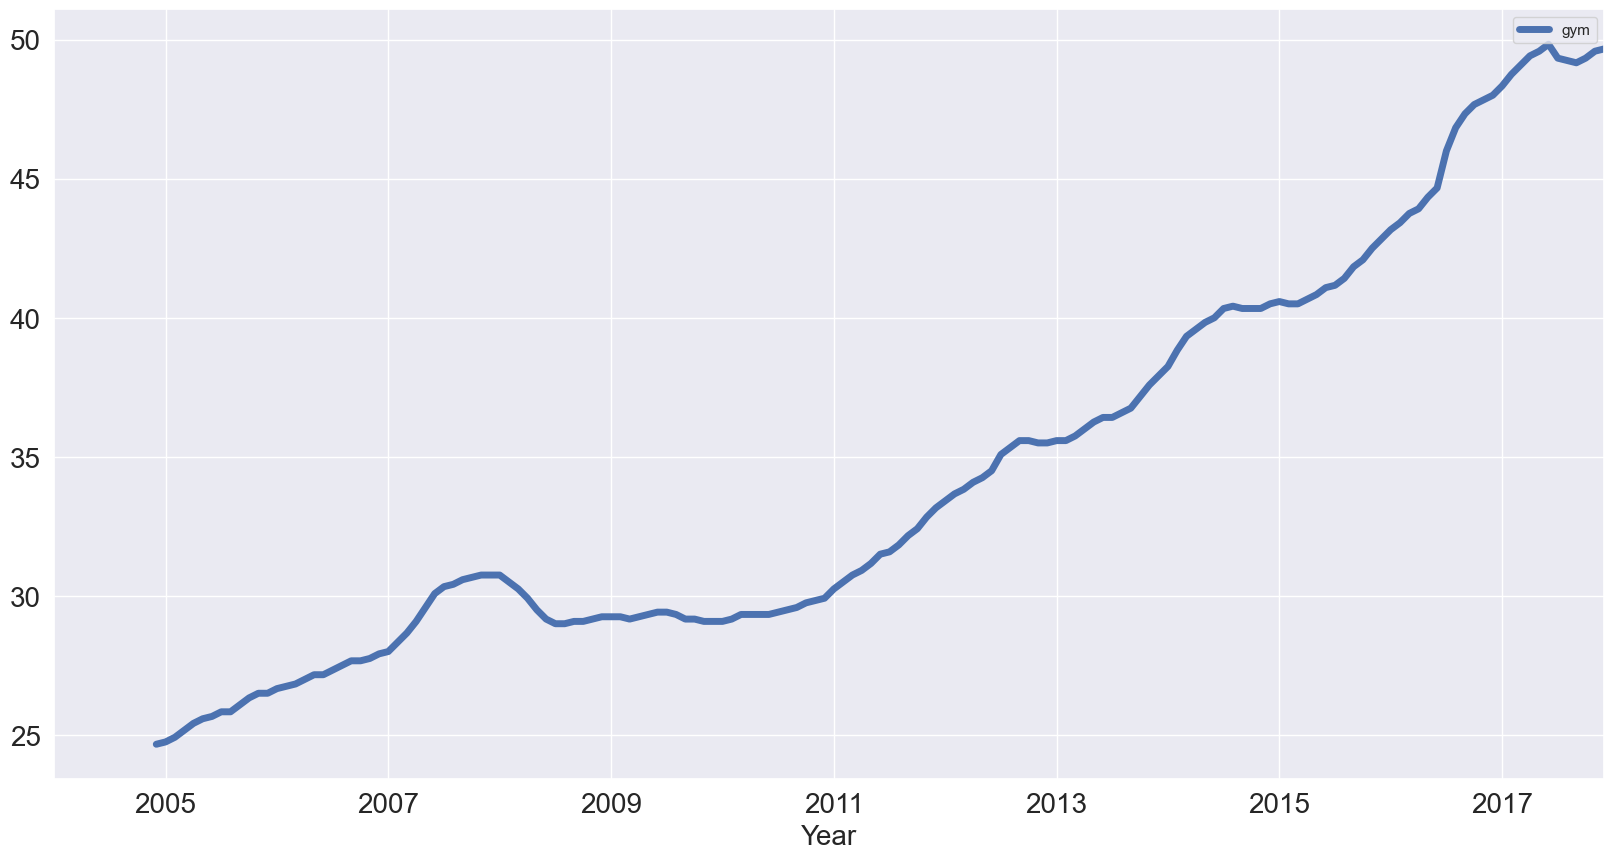

In [10]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

You have successfully removed the seasonality and you see an upward trend for "gym"! But how do these two search terms compare?

You can figure this out by plotting the trends of 'gym' and 'diet' on a single figure:

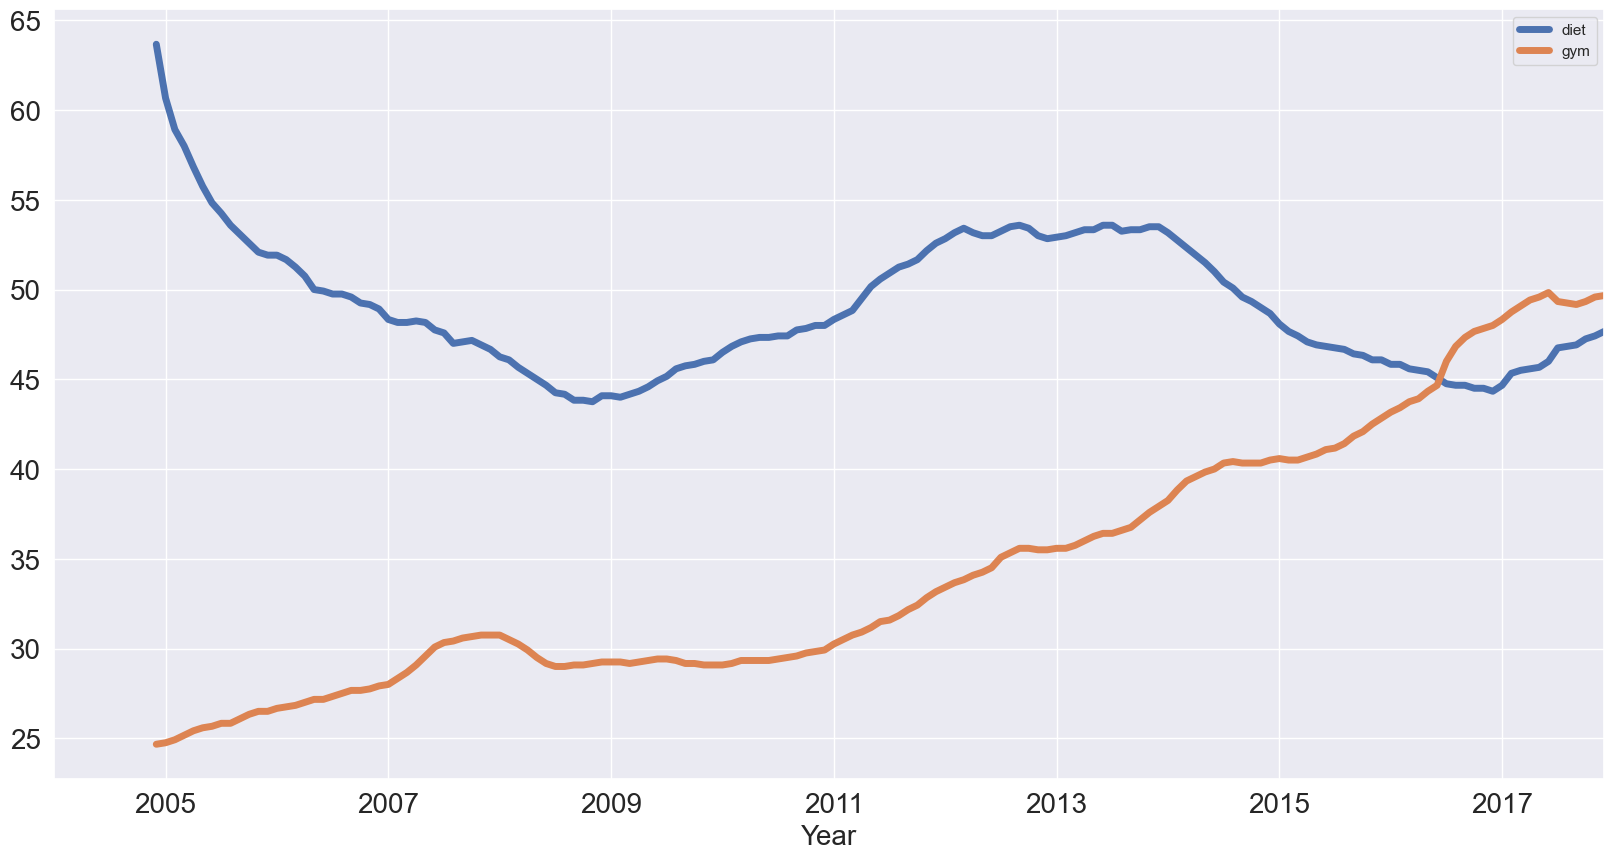

In [11]:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

You created a new DataFrame df_rm that has two columns with the rolling average of 'diet' and 'gym'. You used the pd.concat() function, which takes a list of the columns as a first argument and, since you want to concatenate them as columns, you also added the axis argument, which you set to 1.

Next, you plotted the DataFrame with the plot() method, just like you did before! So now, removing the seasonality, you see that diet potentially has some form of seasonality, whereas gym is actually increasing!

With the trends in the data identified, it's time to think about seasonality, which is the repetitive nature of your time series. As you saw in the beginning of this tutorial, it looked like there were trends and seasonal components to the time series of the data.

**Seasonal Patterns in Time Series Data**

One way to think about the seasonal components to the time series of your data is to remove the trend from a time series, so that you can more easily investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over.

Another way to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

**First-order differencing**

You can use pandas and the diff() and plot() methods to compute and plot the first order difference of the 'diet' Series:

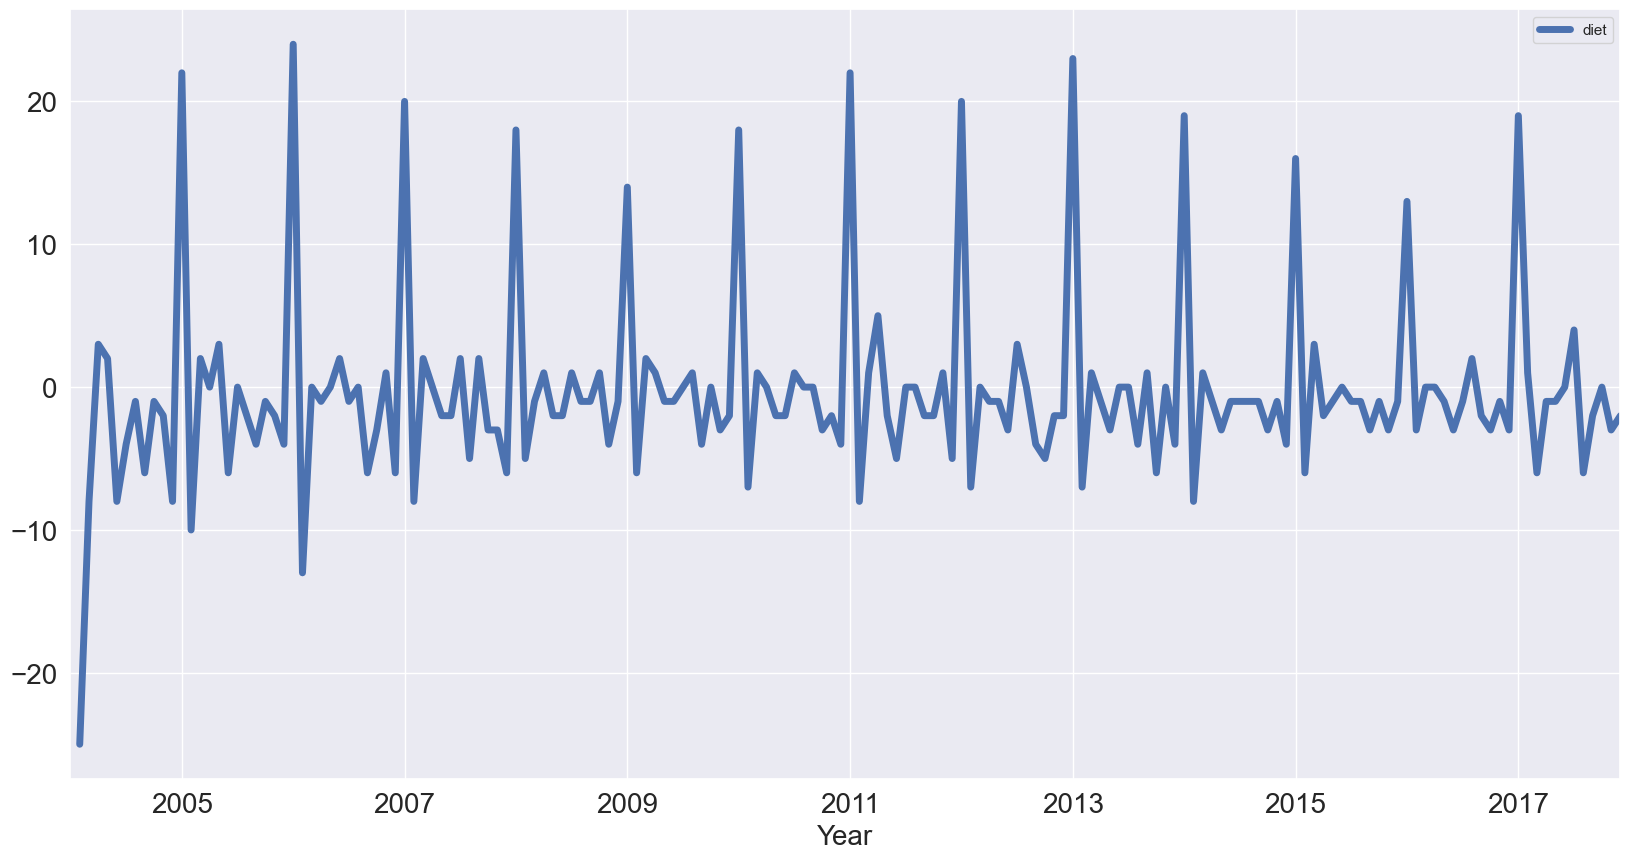

In [12]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

See that you have removed much of the trend and you can really see the peaks in January every year. Each January, there is a huge spike of 20 or more percent on the highest search item you've seen!

**Periodicity and Autocorrelation**

A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months.

Another way to think of this is that if the time series has a peak somewhere, then it will have a peak 12 months after that and, if it has a trough somewhere, it will also have a trough 12 months after that.

Yet another way of thinking about this is that the time series is correlated with itself shifted by 12 months. That means that, if you took the time series and moved it 12 months backwards or forwards, it would map onto itself in some way.

To start off, plot all your time series again to remind yourself of what they look like:

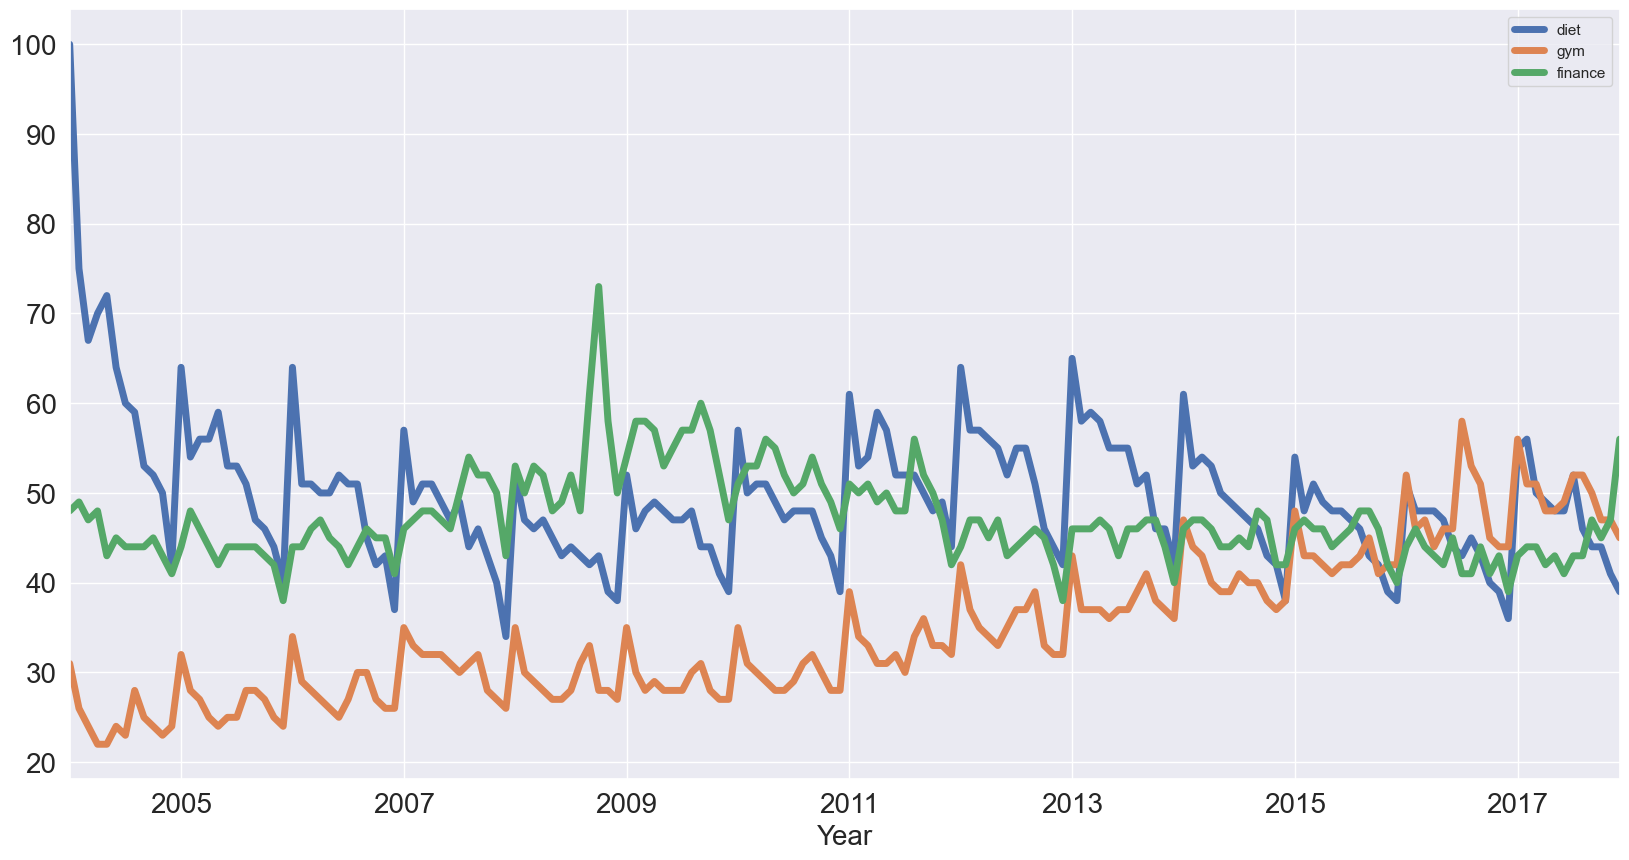

In [13]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [14]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


**Now, what does this above tell you?**

Let's focus on 'diet' and 'gym'; 

They are negatively correlated. 

That's very interesting! Remember that you have a seasonal and a trend component. 

From the correlation coefficient, 'diet' and 'gym' are negatively correlated. 

However, from looking at the times series, it looks as though their seasonal components would be positively correlated and their trends negatively correlated.

The actual correlation coefficient is actually capturing both of those.

What you want to do now is plot the first-order differences of these time series and then compute the correlation of those because that will be the correlation of the seasonal components, approximately.

Remember that removing the trend may reveal correlation in seasonality.

Start off by plotting the first-order differences with the help of .diff() and .plot():

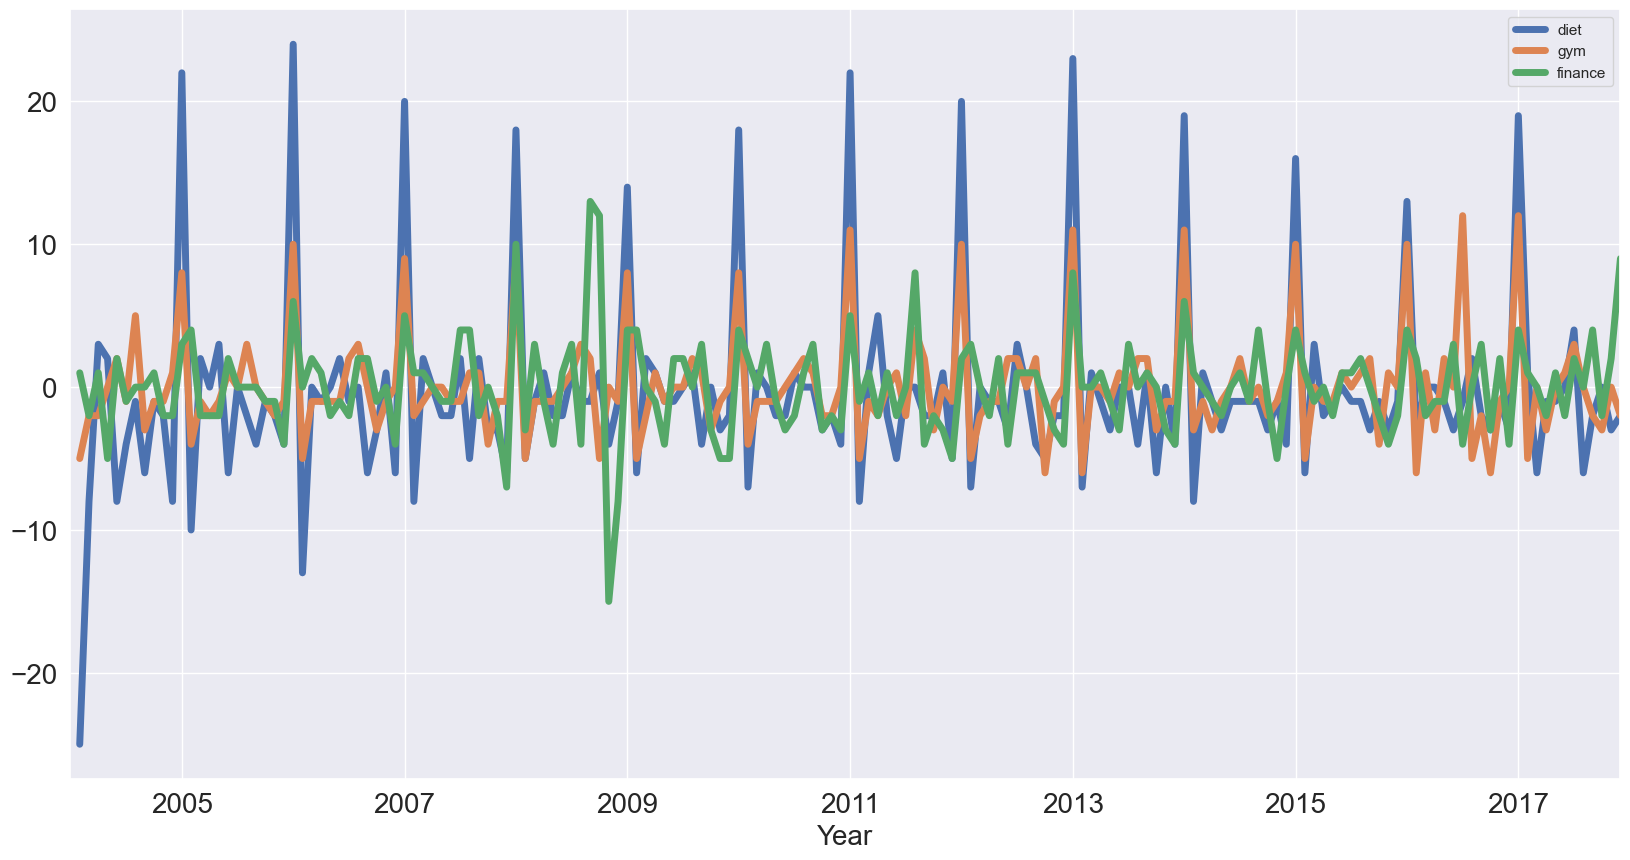

In [15]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

You see that 'diet' and 'gym' are incredibly correlated once you remove the trend. Now, you'll compute the correlation coefficients of the first-order differences of these time series:

In [16]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


Note that once again, there was a slight negative correlation when you were thinking about the trend and the seasonal component. Now, you can see that with the seasonal component, 'diet' and 'gym' are highly correlated, with a coefficient of 0.76.

**Autocorrelation**


Now you've taken a dive into correlation of variables and correlation of time series, it's time to plot the autocorrelation of the 'diet' series: on the x-axis, you have the lag and on the y-axis, you have how correlated the time series is with itself at that lag.

**So, this means that if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.**

**Here, you'll look at the plot and what you should expect to see here is a spike in the autocorrelation function at 12 months: the time series is correlated with itself shifted by twelve months.**

Use the plotting interface of pandas, which has the autocorrelation_plot() function. You can use this function to plot the time series 'diet':

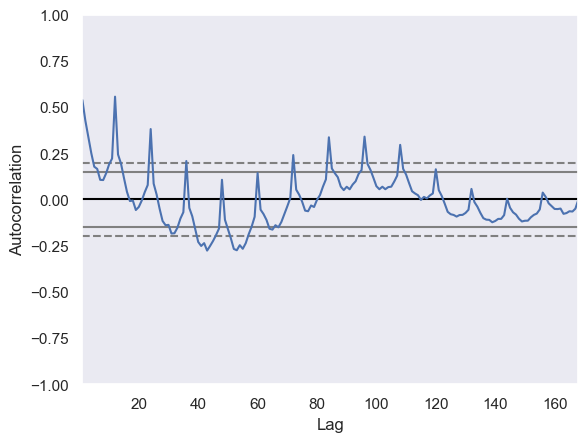

In [17]:
pd.plotting.autocorrelation_plot(diet);

If you included more lags in your axes, you'd see that it is 12 months at which you have this huge peak in correlation. 

You have another peak at a 24 month interval, where it's also correlated with itself. 

You have another peak at 36, but as you move further away, there's less and less of a correlation.

Of course, you have a correlation of itself with itself at a lag of 0.

The dotted lines in the above plot actually tell you about the statistical significance of the correlation.

In this case, you can say that the 'diet' series is genuinely autocorrelated with a lag of twelve months.

You have identified the seasonality of this 12 month repetition!